In [1]:
!pip install google-api-python-client
!pip install pandas
!pip install seaborn

In [4]:
# importing libraries
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [ ]:
api_key = 'add_your_Api_key'
#channel_id = 'UCnz-ZXXER4jOvuED5trXfEA'
channel_ids = ['UCnz-ZXXER4jOvuED5trXfEA', # techTFQ
               'UCLLw7jmFsvfIVaUFsLs8mlQ', # Luke Barousse 
               'UCiT9RITQ9PW6BhXK0y2jaeg', # Ken Jee
               'UC7cs8q-gJRlGwj4A8OmCmXg', # Alex the analyst
               'UC2UXDak6o7rBm23k3Vv5dww' # Tina Huang
              ]

youtube = build('youtube', 'v3', developerKey=api_key)

## Function to get channel statistics

In [6]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return all_data

In [7]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [8]:
channel_data = pd.DataFrame(channel_statistics)

In [9]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Alex The Analyst,1000000,46609471,351,UU7cs8q-gJRlGwj4A8OmCmXg
1,techTFQ,360000,20423450,139,UUnz-ZXXER4jOvuED5trXfEA
2,Luke Barousse,507000,25215260,163,UULLw7jmFsvfIVaUFsLs8mlQ
3,Ken Jee,267000,9334072,288,UUiT9RITQ9PW6BhXK0y2jaeg
4,Tina Huang,791000,35744070,243,UU2UXDak6o7rBm23k3Vv5dww


In [10]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

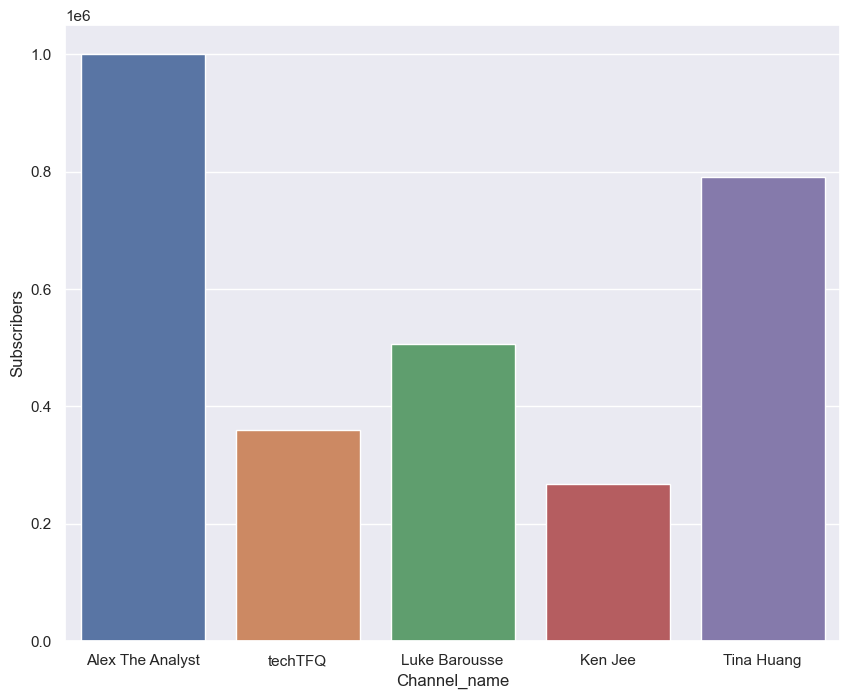

In [11]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

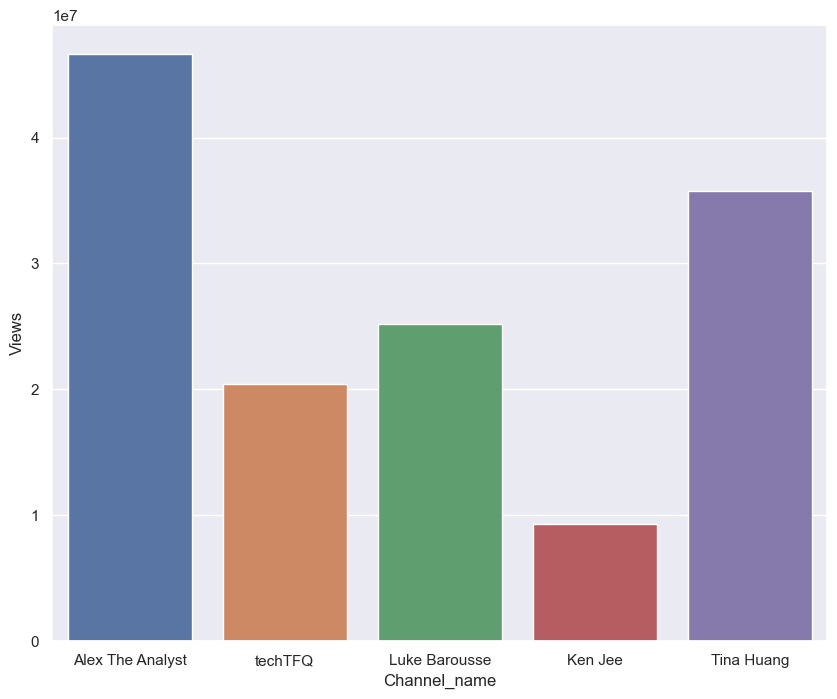

In [12]:
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data)

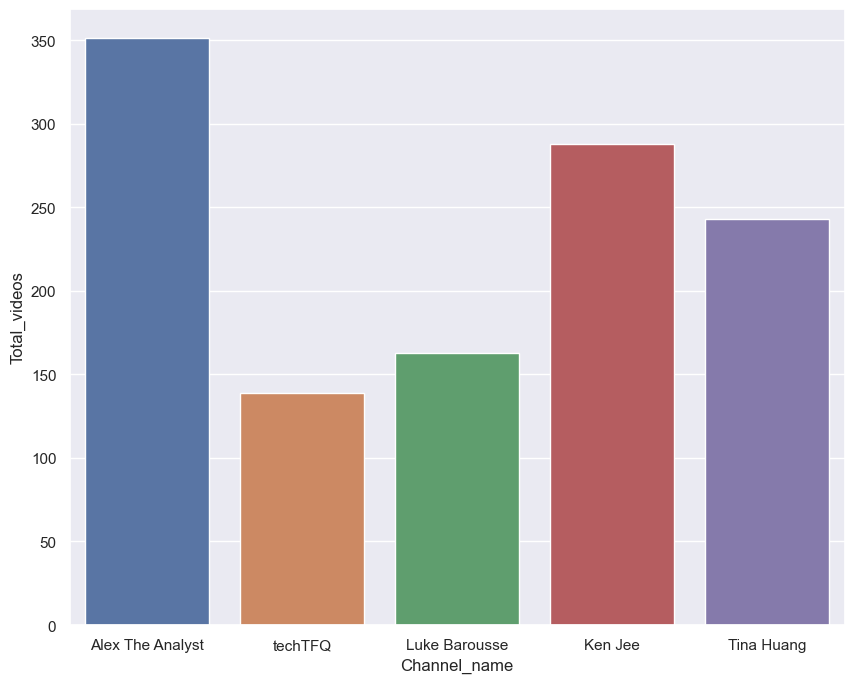

In [13]:
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data)

## Function to get video ids

In [14]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Alex The Analyst,1000000,46609471,351,UU7cs8q-gJRlGwj4A8OmCmXg
1,techTFQ,360000,20423450,139,UUnz-ZXXER4jOvuED5trXfEA
2,Luke Barousse,507000,25215260,163,UULLw7jmFsvfIVaUFsLs8mlQ
3,Ken Jee,267000,9334072,288,UUiT9RITQ9PW6BhXK0y2jaeg
4,Tina Huang,791000,35744070,243,UU2UXDak6o7rBm23k3Vv5dww


In [15]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Ken Jee', 'playlist_id'].iloc[0]

In [16]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

In [17]:
video_ids = get_video_ids(youtube, playlist_id)

In [18]:
video_ids

['lqOrULJvYXg',
 'QEDZaBMozIo',
 'Hyhfa7z0jTk',
 'L5Cis5bOwgw',
 'M1I5HlzQges',
 'T_-0l0ORi5I',
 'w13zJB_jyBI',
 'oZ9rMrqyTbI',
 '6BrYKdqq4uA',
 '1dAvbIMrLos',
 'lqYxmYMkfK8',
 '-JTU734oMfk',
 'HVpbmu7rFYE',
 'NQQ3DRdXAXE',
 'xpi-M2j3NmE',
 'X07w7QFoLpc',
 'RRnThAtKuq0',
 'r3zOpjEOkgE',
 's-XYFEzy9Wc',
 'iBh1wl4o6V4',
 'L6lXKdP4Qbg',
 'xGDl6rlBygU',
 'SY6y6Y8C594',
 '1RUj2aLQx8I',
 'MkzZXSw1Glk',
 '9neDFXTxKxA',
 'UaNNVukM27g',
 '3lN0-S3symM',
 'M-AN8eWLxms',
 'MXFZhbvQqM8',
 '54n61XjKifI',
 'pyWYIRR8rrE',
 'onwRfbt--cw',
 'u6P23ouSYhA',
 'RMMVuvS7S_g',
 '5AwbPAV8FS0',
 'A2OQgU0IRNo',
 'x5Q_nrIqFik',
 '7ja2ELBVMlU',
 'Z2MyLQa_vVw',
 'JTlB9fwYRk0',
 'OJDf_fTENJ4',
 'nqCkdqhV-JY',
 'b8t8lDL13sg',
 't6CD1EwU5kc',
 'eIxHe45hzhQ',
 '3NJOWWvNK3I',
 '4_VtMWJSo1o',
 'OybXWl3IWvI',
 'nRHPQ5ZeB5Y',
 '0JWC4M0Qhqc',
 'oNvyvYGw5n4',
 'GaZRuchRCyw',
 'EBjYqC3aNTA',
 'QMP858aZcow',
 '0ItYIoOrrUs',
 'KzTFoUbThvM',
 'bBJd0oPdNak',
 'Yk-unX4KnV4',
 'z0_xrtFdFj8',
 'vVpkXEIn-q0',
 'aipz4p7GDL4',
 'iPdO9M

## Function to get video details

In [24]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               # Dislikes = video['statistics']['dislikeCount'],
                               Comments = video['statistics']['commentCount']
                               )
            all_video_stats.append(video_stats)
    
    return all_video_stats

In [25]:
video_details = get_video_details(youtube, video_ids)

In [28]:
video_data = pd.DataFrame(video_details)

In [30]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
# video_data['Dislikes'] = pd.to_numeric(video_data['Dislikes'])
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data

,Title,Published_date,Views,Likes,Comments
0,So You Think You Can ANALYZE? (Data Content Cr...,2024-09-21,41086,1473,98
1,Moving On,2024-04-22,11574,490,91
2,How Does ChatGPT Image Analysis Do on an IQ Test?,2023-11-30,4117,90,25
3,A Data Dream Come True,2023-11-17,2558,97,23
4,The Death of the Full-Time Job,2023-09-22,6589,423,78
...,...,...,...,...,...
283,How to Simulate NBA Games in Python,2018-11-19,19225,416,50
284,Should You Get A Masters in Data Science?,2018-11-14,20957,302,133
285,How I Became A Data Scientist From a Business ...,2018-11-12,6750,200,23
286,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,9446,196,17


In [31]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)

In [32]:
top10_videos

,Title,Published_date,Views,Likes,Comments
190,How I Would Learn Data Science (If I Had to St...,2020-05-08,1406487,48816,1986
166,Beginner Kaggle Data Science Project Walk-Thro...,2020-07-17,414149,8619,457
211,The Best Free Data Science Courses Nobody is T...,2020-03-09,353232,21244,620
70,How I Would Learn Data Science in 2022 (If I H...,2021-12-27,347050,14971,528
217,3 Proven Data Science Projects for Beginners (...,2020-02-17,337434,17944,526
203,Data Science Project from Scratch - Part 1 (Pr...,2020-04-03,224114,5447,174
256,The Projects You Should Do To Get A Data Scien...,2019-07-30,157699,5769,251
216,How to Set Up Your Data Science Environment (A...,2020-02-21,149247,2706,95
187,How to Make A Data Science Portfolio Website w...,2020-05-15,144781,4651,194
202,Data Science Project from Scratch - Part 2 (Da...,2020-04-06,142677,3713,630


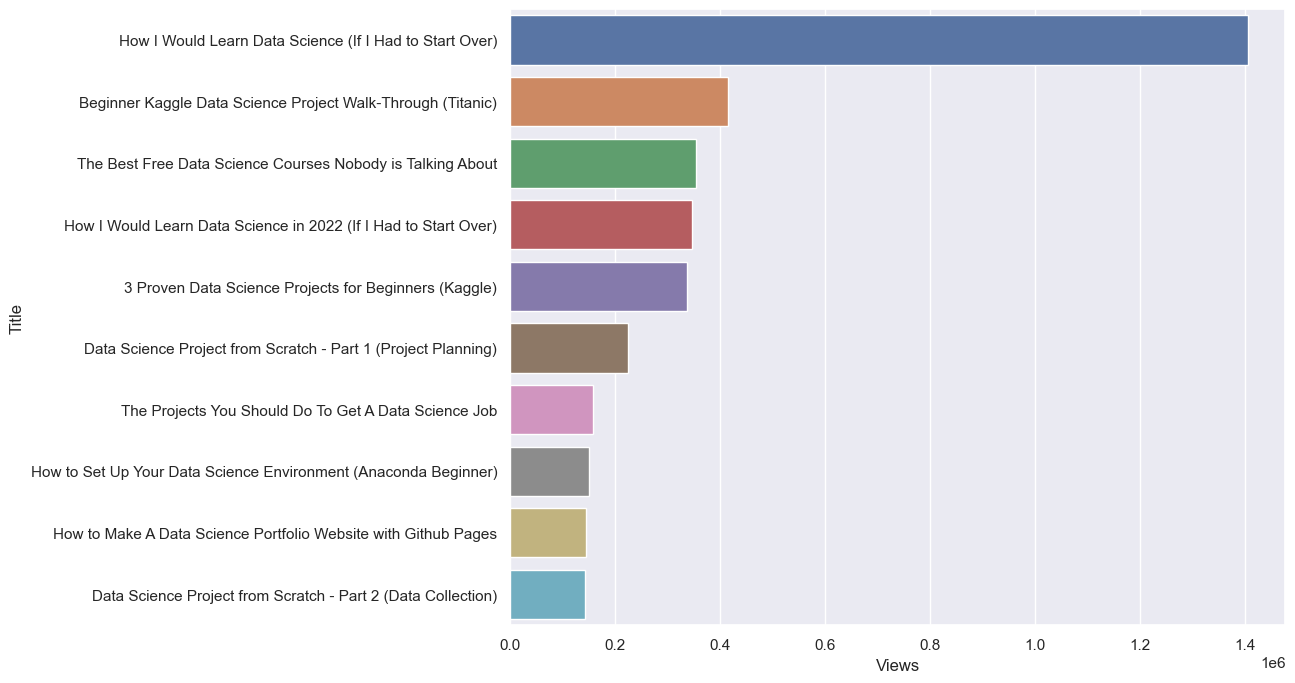

In [33]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

In [34]:
video_data

,Title,Published_date,Views,Likes,Comments
0,So You Think You Can ANALYZE? (Data Content Cr...,2024-09-21,41086,1473,98
1,Moving On,2024-04-22,11574,490,91
2,How Does ChatGPT Image Analysis Do on an IQ Test?,2023-11-30,4117,90,25
3,A Data Dream Come True,2023-11-17,2558,97,23
4,The Death of the Full-Time Job,2023-09-22,6589,423,78
...,...,...,...,...,...
283,How to Simulate NBA Games in Python,2018-11-19,19225,416,50
284,Should You Get A Masters in Data Science?,2018-11-14,20957,302,133
285,How I Became A Data Scientist From a Business ...,2018-11-12,6750,200,23
286,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,9446,196,17


In [35]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [36]:
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,So You Think You Can ANALYZE? (Data Content Cr...,2024-09-21,41086,1473,98,Sep
1,Moving On,2024-04-22,11574,490,91,Apr
2,How Does ChatGPT Image Analysis Do on an IQ Test?,2023-11-30,4117,90,25,Nov
3,A Data Dream Come True,2023-11-17,2558,97,23,Nov
4,The Death of the Full-Time Job,2023-09-22,6589,423,78,Sep
...,...,...,...,...,...,...
283,How to Simulate NBA Games in Python,2018-11-19,19225,416,50,Nov
284,Should You Get A Masters in Data Science?,2018-11-14,20957,302,133,Nov
285,How I Became A Data Scientist From a Business ...,2018-11-12,6750,200,23,Nov
286,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,9446,196,17,Jul


In [37]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [38]:
videos_per_month

,Month,size
0,Apr,23
1,Aug,27
2,Dec,20
3,Feb,25
4,Jan,29
5,Jul,27
6,Jun,20
7,Mar,32
8,May,24
9,Nov,22


In [39]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [40]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [42]:
videos_per_month = videos_per_month.sort_index()

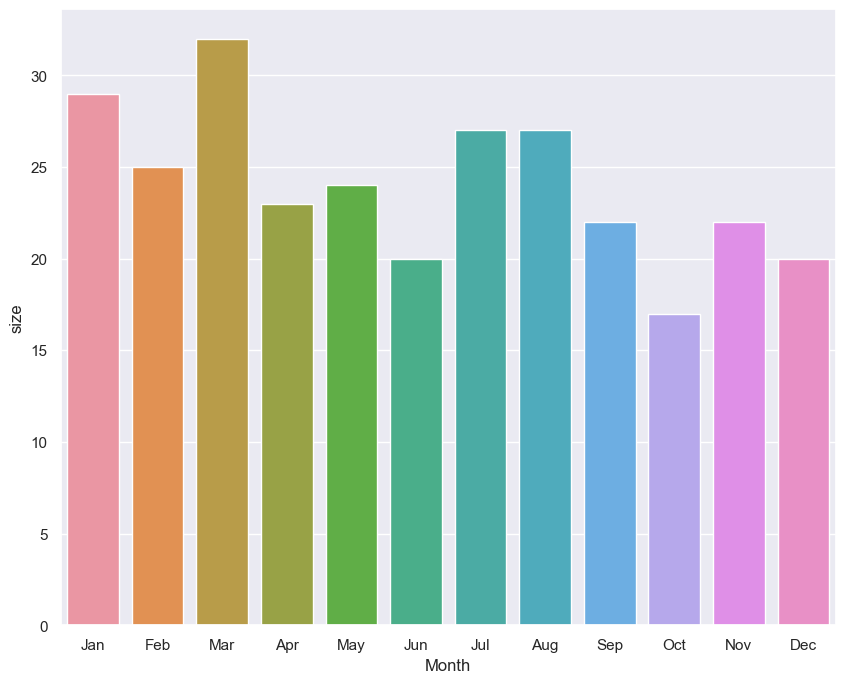

In [43]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

In [44]:
video_data.to_csv('Video_Details(Ken Jee).csv')